### Student Information
Name: 鄭宗元

Student ID: 111065428

GitHub ID: yurisoba

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Common
Import all libraries, download required data (`punkt` and `stopwords` for `nltk`) and defines common functions.

In [1]:
%load_ext autoreload
%autoreload 2

import os

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

%matplotlib inline

import helpers.data_mining_helpers as dmh

from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("punkt")
nltk.download("stopwords")

# Common stop function used in part-1 and part-2
stops = set(stopwords.words(("english")))
def stop(a: list[str]) -> list[str]:
    """
    Heuristically remove terms from list of terms, returns a new list with remaining terms.
    Rules:
    - not in stop words list
    - does not contain number
    """
    global stops
    r = []
    for t in a:
        is_not_stop = t not in stops
        has_no_number = not any([str(digit) in t for digit in (0,1,2,3,4,5,6,7,8,9)])
        if all([is_not_stop, has_no_number]):
            r.append(t)
    return r


[nltk_data] Downloading package punkt to /home/ben/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part 1
## Setup

In [30]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

col = ['coral', 'blue', 'black', 'orange']

[nltk_data] Downloading package punkt to /home/ben/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exercise 2

In [9]:
X.query("category_name == 'sci.med'")

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


## Exercise 5

In [12]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['isnull'] = NA_df['missing_example'].isnull()
NA_df

,id,missing_example,isnull
0,A,NaN,True
1,B,NaN,True
2,C,NaN,False
3,D,None,False
4,E,None,True
5,F,,False


- In example id 2 and 3: `"NaN"` and `"None"` are valid strings with length of 3 and 4 respectively, thus are not null.
- In example id 5, `""` is a valid string of length 0, which are not considered null as well.
- We can observe that all valid string will never be nuil.


## Exercise 6

In [24]:
X_sample = X.sample(n=1000, random_state=42)
display(X.shape)
display(X_sample.shape)

(2257, 3)

(1000, 3)

- The length of `X_sample` is smaller than the length of `X`
- `X_sample` and `X` has the same amount of columns.
- `X_sample` is a subset of `X`
- The length of `X_sample` cannot be bigger than the length of `X` when `replace=False` (which is the default value)

## Exercise 8

<Axes: title={'center': 'Category distribution'}, xlabel='category_name', ylabel='count'>

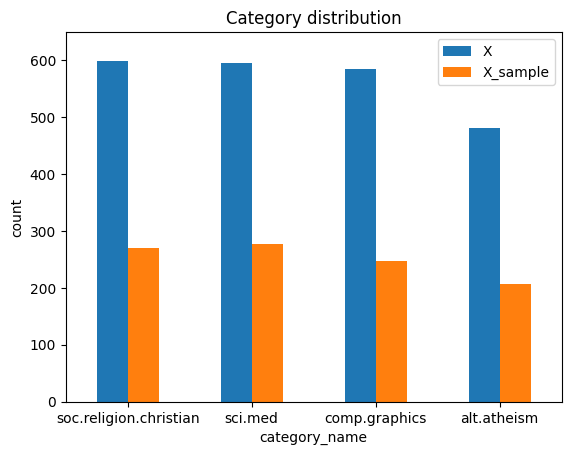

In [50]:
xsvc = X_sample["category_name"].value_counts().to_frame()
xvc = X["category_name"].value_counts().to_frame()

# make column name represents their DF name for visualization
xvc.rename(columns={"count": "X"}, inplace=True)
xvc["X_sample"] = xsvc["count"]

xvc.plot(kind="bar",
         ylim=(0, xvc["X"].max() + 50),
         ylabel="count",
         title="Category distribution",
         rot=0)

## Exercise 10

In [54]:
"""
Get the index of the second nonzero item of document 5 (id=4)
"""
# since X_counts is a sparse matrix, we can get it's list of non-zero item
# indices are not sorted yet, sort it since we need to get the second item
nnidx = X_counts[4].sorted_indices().nonzero()

# the second item, assume len(nnidx) > 1
nnidx = nnidx[1] 

# nonzero() returns two arrays: (row,...) and (col,...)
# since it's one-dimensional, we only care about the col index, thus:
nnidx = nnidx[1]

# find the term given the index
count_vect.get_feature_names_out()[nnidx]

'01'

## Exercise 11

For this section, top-$k$ terms and top-$k$ documents are selected from each category, where selecteed terms and documents represent most frequent terms that are less used in other categories.
The importance/uniqueness of the terms are measured with a novel metric.
Text is preprocessed using previously-built analyzer, stop words and terms that contains number are removed.

### Tf-Icf
We introduce a variation of Tf-Idf, Tf-icf, by measuring in a per-category basis instead of per-document basis:

$$\texttt{tf}(t, c) = \frac{f_{t,c}}{\sum_{t' \in c}f_{t',c}}$$
$$\texttt{cf} = |{c \in C: t \in c}|$$
$$\texttt{icf} = \log\frac{|C|}{\texttt{cf}}$$

- `tf` is the relative frequency of term $t$ within category $c$
- `cf` is the number of category where the term $t$ appears
- `icf` is the logarithmically scaled inverse fraction of the category that contains the term $t$

### Term Ranking
Term that appears in less category has a higher `icf` score, while common terms will have $\texttt{icf}=0$.
Within each category, term occurrences are summed weightedly by their `icf` score.
Top-$k$ terms of each category are then selected.

### Document Ranking
Relevant document are selected using following relevancy function:
$$ R(d) = \sum \texttt{tf}_{t \in d, t \in T_c} * \texttt{icf}_t $$
where $T_c$ is a set of top-$k$ terms of category $c$ selected using previously mentioned term ranking method.

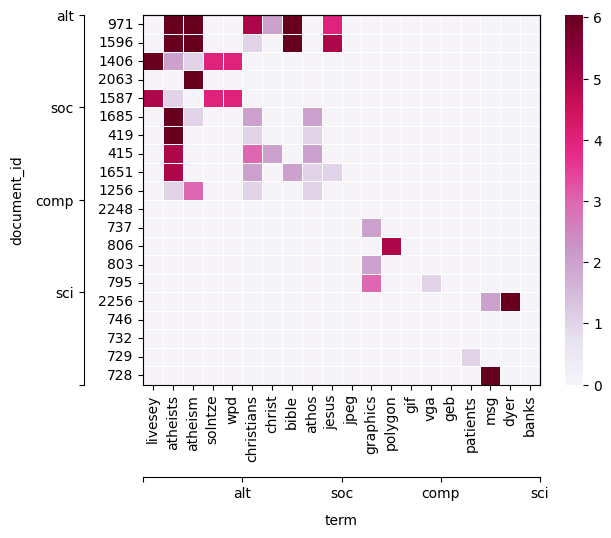

In [33]:
### ===================================
# (1) analyze and heuristically remove meaningless term from text
cv2 = CountVectorizer()

Xa_counts = cv2.fit_transform(X.apply(lambda x: " ".join(stop(analyze(x["text"]))), axis=1))

### ===================================
# (2) calculate tf-icf score
# get list of indices of documents of each category
doc_list = [X[X["category_name"] == cat].index for cat in categories]

# modified tf: frequency of term within each category
tf_list = [Xa_counts[doc, :] / Xa_counts[doc, :].sum() for doc in doc_list]

# category frequency: number of categories a term appears in
cf = np.array(sum([Xa_counts[doc].sum(axis=0).astype(bool).astype(int) for doc in doc_list]))[0]
icf = np.asarray(np.log2(len(categories)/np.array(cf)))

### ===================================
# (3) select top-k terms and documents
top_k_k = 5
# rank term in each category by calculating their icf
term_ranks = [np.array(Xa_counts[doc].sum(axis=0))[0] * icf for doc in doc_list]

# find top-k term in each category
top_k_term = np.array([tr.argsort()[-top_k_k:][::-1] for tr in term_ranks])

# find top-k documents in each category with higest tf-icf * appearance
doc_rank = [np.array([(Xa_counts[doc, term_idx] * icf[term_idx]).toarray().flatten() for term_idx in top_k_term[0]]).sum(axis=0) for doc in doc_list]
top_k_doc = np.array([doc[dr.argsort()[-top_k_k:][::-1]] for doc, dr in zip(doc_list, doc_rank)])

### ===================================
# (4) heatmap
tk_plot_x = top_k_term.flatten()
tk_plot_y = top_k_doc.flatten()
tk_plot_z = [[float(Xa_counts[doc_idx, term_idx]) for term_idx in tk_plot_x] for doc_idx in tk_plot_y]
# replace index with the actual term
tk_plot_x = [cv2.get_feature_names_out()[idx] for idx in tk_plot_x]

tk_ax = sns.heatmap(pd.DataFrame(tk_plot_z, columns=tk_plot_x, index=tk_plot_y),
                    cmap="PuRd",
                    linewidths=.5,
                    robust=True
                    )
tk_ax.set(xlabel="term", ylabel="document_id")
tk_ax.xaxis.set_label_coords(0.5, -0.35)
tk_ax.yaxis.set_label_coords(-0.3, 0.5)

tk_ax_x = tk_ax.twiny()
tk_ax_x.set_xticks([0, 0.25, 0.5, 0.75, 1.0], ["", "alt", "soc", "comp", "sci"])
tk_ax_x.xaxis.set_ticks_position("bottom")
tk_ax_x.xaxis.set_label_position("bottom")
tk_ax_x.spines["bottom"].set_position(("axes", -0.25))

tk_ax_y = tk_ax.twinx()
tk_ax_y.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
tk_ax_y.set_yticklabels(["", "sci", "comp", "soc", "alt"])
tk_ax_y.yaxis.set_ticks_position("left")
tk_ax_y.yaxis.set_label_position("left")
tk_ax_y.spines["left"].set_position(("axes", -0.15))

We can observe that the top-k terms of `alt.atheism` and `soc.religion.christian` appears in both category and the same terms are used very frequently.
This phenomena is not observed in the other two categories, where their top-ks are pretty much unique to their own discussion group.

We can observe that each term with high tf-idf is almost unique across document, which is the definition of tf-idf itself.

## Exercise 12

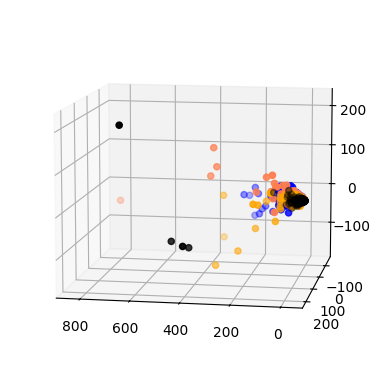

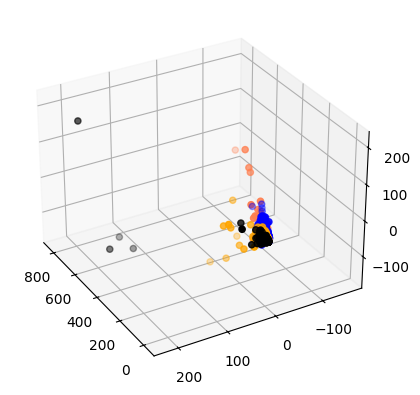

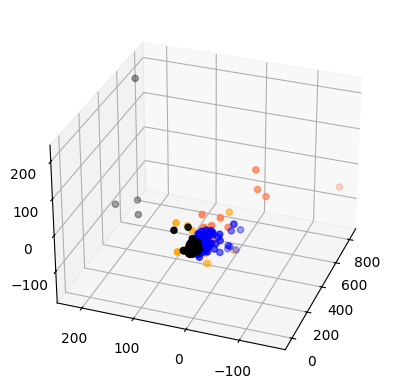

In [228]:
Xrr = PCA(n_components=3).fit_transform(X_counts.toarray())

def create_plot(elev, azim):
    global Xrr, col, categories
    ffig = plt.figure()
    axes = ffig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim)
    for c, cat in zip(col, categories):
        xs = Xrr[X["category_name"] == cat].T[0]
        ys = Xrr[X["category_name"] == cat].T[1]
        zs = Xrr[X["category_name"] == cat].T[2]
        axes.scatter(xs, ys, zs, c = c, marker='o')
    return ffig

create_plot(10, 100).show()
create_plot(30, 150).show()
create_plot(30, 200).show()

## Exercise 13

In [247]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray())[0])

px.bar(x=count_vect.get_feature_names_out()[:300],
              y=term_frequencies[:300]).show()

## Exercise 14

In [246]:
# sum the frequencies of each term
tf_list = np.asarray(X_counts.sum(axis=0))[0]
# prepare format for exercise 15
tf_tuples = list(enumerate(tf_list))

px.bar(x=[count_vect.get_feature_names_out()[idx] for idx, _ in tf_tuples[:300]],
       y=[count for _, count in tf_tuples[:300]]).show()



## Exercise 15

In [241]:
# note: duplicate code from ex14 so each cell can be runned individually

# sum the frequencies of each term
tf_list = np.asarray(X_counts.sum(axis=0))[0]
# sort the frequencies
tf_tuples = sorted(enumerate(tf_list), key=lambda x:x[1], reverse=True)

px.bar(x=[count_vect.get_feature_names_out()[idx] for idx, _ in tf_tuples[:300]],
       y=[count for _, count in tf_tuples[:300]]).show()


## Exercise 16

In [240]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X["category"])
mlb.transform(X["category_name"]).tolist()

[[0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0,

Generating binarization of `category_name` using previously fitted `mlb` will not work,
as it has only learned the classes of `category`, and has not seen any class from `category_name`.

# Part 2
## Setup

In [41]:
sources = ("amazon_cells", "yelp")

raw_dfs = {}
for cat in sources:
    raw_dfs[cat] = pd.read_csv(os.path.join("sentiment", cat + "_labelled.txt"),
                sep='\t',
                header=None,
                names=("text", "pos"))
    raw_dfs[cat]["source"] = cat

with open("sentiment/imdb_labelled.txt") as f:
    l = map(lambda x:x.strip().split('\t'), f)
    l = map(lambda x: (x[0], int(x[1])), l)

    imdb_df = pd.DataFrame(l)
imdb_df.rename(columns={0:"text", 1: "pos"}, inplace=True)
imdb_df["source"] = "imdb"

raw_dfl = list(raw_dfs.values())
raw_dfl.append(imdb_df)

sen_df = pd.concat(raw_dfl, ignore_index=True)
s_count_vec = CountVectorizer()
sen_counts = s_count_vec.fit_transform(sen_df.text)
sen_analyze = s_count_vec.build_analyzer()
sen_counts = s_count_vec.fit_transform(sen_df.apply(lambda x: " ".join(stop(sen_analyze(x["text"]))), axis=1))


sources = ("amazon_cells", "imdb", "yelp")


## Exercise 2

In [42]:
sen_df.query("source == 'yelp'")

,text,pos,source
1000,Wow... Loved this place.,1,yelp
1001,Crust is not good.,0,yelp
1002,Not tasty and the texture was just nasty.,0,yelp
1003,Stopped by during the late May bank holiday of...,1,yelp
1004,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
1995,I think food should have flavor and texture an...,0,yelp
1996,Appetite instantly gone.,0,yelp
1997,Overall I was not impressed and would not go b...,0,yelp
1998,"The whole experience was underwhelming, and I ...",0,yelp


## Exercise 8


<Axes: title={'center': 'Source distribution'}, xlabel='source', ylabel='count'>

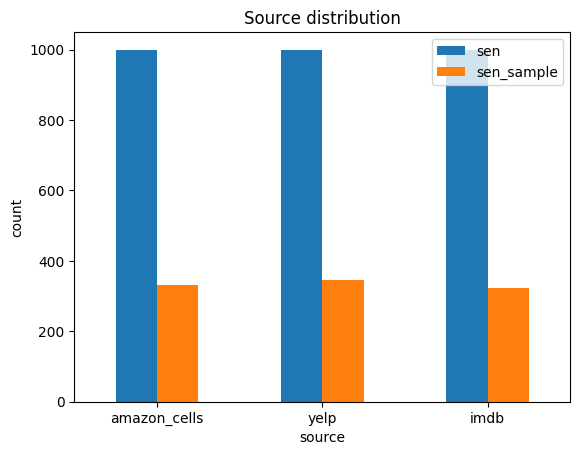

In [43]:
sen_sample_df = sen_df.sample(n=1000, random_state=878)
ssvc = sen_sample_df["source"].value_counts().to_frame()
svc = sen_df["source"].value_counts().to_frame()

svc.rename(columns={"count":"sen"}, inplace=True)
svc["sen_sample"] = ssvc["count"]

svc.plot(kind="bar",
         ylim=(0, svc["sen"].max() + 50),
         ylabel="count",
         title="Source distribution",
         rot=0)

## Exercise 10
Get the index of the second nonzero item of document 5 `(id=4)`

In [44]:
# since sen_counts is a sparse matrix, we can get it's list of non-zero item
# indices are not sorted yet, sort it since we need to get the second item
s_nnidx = sen_counts[4].sorted_indices().nonzero()

# the second item, assume len(s_nnidx) > 1
s_nnidx = s_nnidx[1]

# nonzero() returns two arrays: (row,...) and (col,...)
# since it's one-dimensional, we only care about the col index, thus:
s_nnidx = s_nnidx[1]

# find the term given the index
s_count_vec.get_feature_names_out()[s_nnidx]

'mic'

##  Exercise 11
For this section, we reuse the tf-icf from part-1 to find unique words from each source.

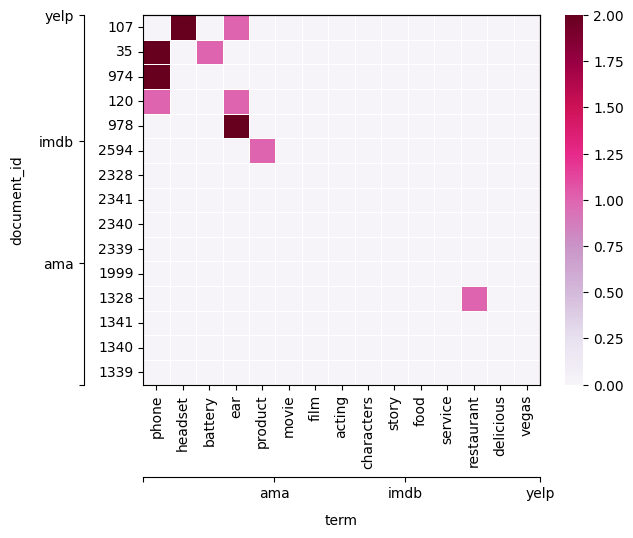

In [45]:
# (1) calculate tf-icf score
# get list of indices of documents of each source 
n_doc_list = [sen_df[sen_df["source"] == src].index for src in sources]

# modified tf: frequency of term within each source
n_tf_list = [sen_counts[doc, :] / sen_counts[doc, :].sum() for doc in n_doc_list]

# category frequency: number of source a term appears in
n_cf = np.array(sum([sen_counts[doc].sum(axis=0).astype(bool).astype(int) for doc in n_doc_list]))[0]
n_icf = np.asarray(np.log2(len(sources)/np.array(n_cf)))

n_doc_list
### ===================================
# (2) select top-k terms and documents
n_top_k_k = 5
# rank term in each category by calculating their icf
n_term_ranks = [np.array(sen_counts[doc].sum(axis=0))[0] * n_icf for doc in n_doc_list]

# find top-k term in each category
n_top_k_term = np.array([tr.argsort()[-n_top_k_k:][::-1] for tr in n_term_ranks])

# find top-k documents in each category with higest tf-icf * appearance
n_doc_rank = [np.array([(sen_counts[doc, term_idx] * n_icf[term_idx]).toarray().flatten() for term_idx in n_top_k_term[0]]).sum(axis=0) for doc in n_doc_list]
n_top_k_doc = np.array([doc[dr.argsort()[-n_top_k_k:][::-1]] for doc, dr in zip(n_doc_list, n_doc_rank)])

### ===================================
# (3) heatmap
n_tk_plot_x = n_top_k_term.flatten()
n_tk_plot_y = n_top_k_doc.flatten()
n_tk_plot_z = [[float(sen_counts[doc_idx, term_idx]) for term_idx in n_tk_plot_x] for doc_idx in n_tk_plot_y]
# replace index with the actual term
n_tk_plot_x = [s_count_vec.get_feature_names_out()[idx] for idx in n_tk_plot_x]

n_tk_ax = sns.heatmap(pd.DataFrame(n_tk_plot_z, columns=n_tk_plot_x, index=n_tk_plot_y),
                    cmap="PuRd",
                    linewidths=.5,
                    )
n_tk_ax.set(xlabel="term", ylabel="document_id")
n_tk_ax.xaxis.set_label_coords(0.5, -0.35)
n_tk_ax.yaxis.set_label_coords(-0.3, 0.5)

n_tk_ax_x = n_tk_ax.twiny()
n_tk_ax_x.set_xticks([0, 0.33, 0.66, 1.0], ["", "ama", "imdb", "yelp"])
n_tk_ax_x.xaxis.set_ticks_position("bottom")
n_tk_ax_x.xaxis.set_label_position("bottom")
n_tk_ax_x.spines["bottom"].set_position(("axes", -0.25))

n_tk_ax_y = n_tk_ax.twinx()
n_tk_ax_y.set_yticks([0, 0.33, 0.66, 1.0], ["", "ama", "imdb", "yelp"])
n_tk_ax_y.yaxis.set_ticks_position("left")
n_tk_ax_y.yaxis.set_label_position("left")
n_tk_ax_y.spines["left"].set_position(("axes", -0.15))


## Exercise 12

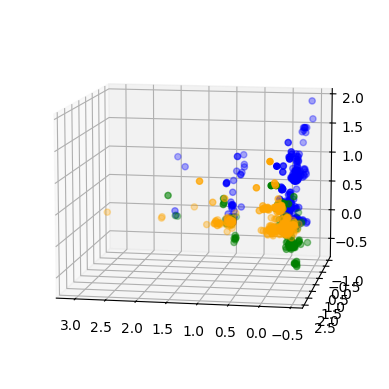

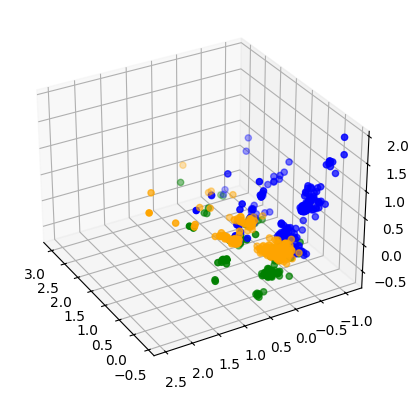

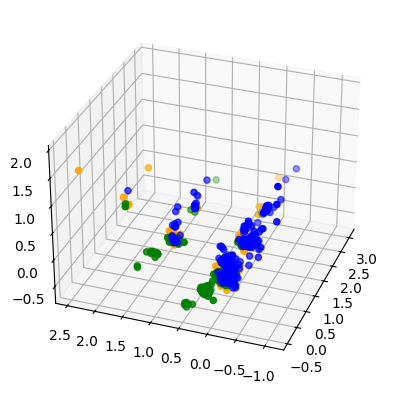

In [46]:
Srr = PCA(n_components=3).fit_transform(sen_counts.toarray())

def create_plot(elev, azim):
    global Srr, sources
    col = ("green", "blue", "orange")
    ffig = plt.figure()
    axes = ffig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim)
    for c, cat in zip(col, sources):
        xs = Srr[sen_df["source"] == cat].T[0]
        ys = Srr[sen_df["source"] == cat].T[1]
        zs = Srr[sen_df["source"] == cat].T[2]
        axes.scatter(xs, ys, zs, c = c, marker='o')
    return ffig

create_plot(10, 100).show()
create_plot(30, 150).show()
create_plot(30, 200).show()

## Exercise 13

In [47]:
n_term_freq = []
for j in range(0,sen_counts.shape[1]):
    n_term_freq.append(sum(sen_counts[:,j].toarray())[0])

px.bar(x=s_count_vec.get_feature_names_out()[:300],
              y=n_term_freq[:300]).show()

## Exercise 14

In [48]:
# sum the frequencies of each term
n_tf_list = np.asarray(sen_counts.sum(axis=0))[0]
# prepare format for exercise 15
n_tf_tuples = list(enumerate(n_tf_list))

px.bar(x=[s_count_vec.get_feature_names_out()[idx] for idx, _ in n_tf_tuples[:300]],
       y=[count for _, count in n_tf_tuples[:300]]).show()


## Exercise 15

In [49]:
# sum the frequencies of each term
n_tf_list = np.asarray(sen_counts.sum(axis=0))[0]
# prepare format for exercise 15
n_tf_tuples = sorted(enumerate(n_tf_list), key=lambda x:x[1], reverse=True)

px.bar(x=[s_count_vec.get_feature_names_out()[idx] for idx, _ in n_tf_tuples[:300]],
       y=[count for _, count in n_tf_tuples[:300]]).show()


## Exercise 16

In [50]:
nmlb = preprocessing.LabelBinarizer()
nmlb.fit(sen_df["source"])
nmlb.transform(sen_df["pos"])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Generating binarization of `pos` using previously fitted `mlb` will not work, as it has only learned the classes of `source`, and has not seen any class from `pos`.


# Part 3

### 1 - Meaningful new data visualizations
(From part 1 - exercise 11)

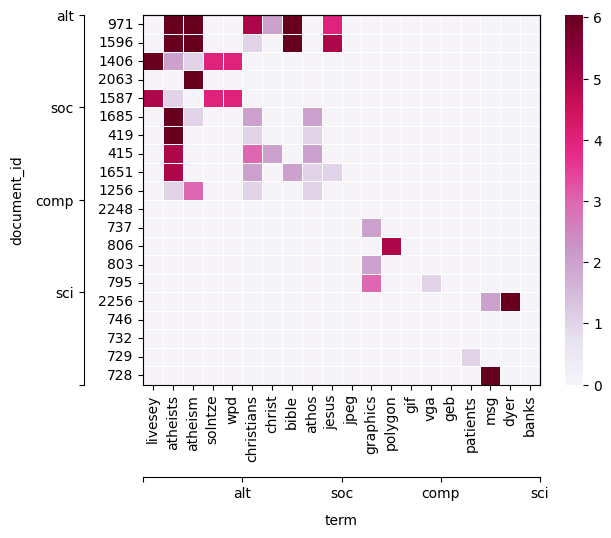

In [ ]:
### ===================================
# (1) analyze and heuristically remove meaningless term from text
cv2 = CountVectorizer()

Xa_counts = cv2.fit_transform(X.apply(lambda x: " ".join(stop(analyze(x["text"]))), axis=1))

### ===================================
# (2) calculate tf-icf score
# get list of indices of documents of each category
doc_list = [X[X["category_name"] == cat].index for cat in categories]

# modified tf: frequency of term within each category
tf_list = [Xa_counts[doc, :] / Xa_counts[doc, :].sum() for doc in doc_list]

# category frequency: number of categories a term appears in
cf = np.array(sum([Xa_counts[doc].sum(axis=0).astype(bool).astype(int) for doc in doc_list]))[0]
icf = np.asarray(np.log2(len(categories)/np.array(cf)))

### ===================================
# (3) select top-k terms and documents
top_k_k = 5
# rank term in each category by calculating their icf
term_ranks = [np.array(Xa_counts[doc].sum(axis=0))[0] * icf for doc in doc_list]

# find top-k term in each category
top_k_term = np.array([tr.argsort()[-top_k_k:][::-1] for tr in term_ranks])

# find top-k documents in each category with higest tf-icf * appearance
doc_rank = [np.array([(Xa_counts[doc, term_idx] * icf[term_idx]).toarray().flatten() for term_idx in top_k_term[0]]).sum(axis=0) for doc in doc_list]
top_k_doc = np.array([doc[dr.argsort()[-top_k_k:][::-1]] for doc, dr in zip(doc_list, doc_rank)])

### ===================================
# (4) heatmap
tk_plot_x = top_k_term.flatten()
tk_plot_y = top_k_doc.flatten()
tk_plot_z = [[float(Xa_counts[doc_idx, term_idx]) for term_idx in tk_plot_x] for doc_idx in tk_plot_y]
# replace index with the actual term
tk_plot_x = [cv2.get_feature_names_out()[idx] for idx in tk_plot_x]

tk_ax = sns.heatmap(pd.DataFrame(tk_plot_z, columns=tk_plot_x, index=tk_plot_y),
                    cmap="PuRd",
                    linewidths=.5,
                    robust=True
                    )
tk_ax.set(xlabel="term", ylabel="document_id")
tk_ax.xaxis.set_label_coords(0.5, -0.35)
tk_ax.yaxis.set_label_coords(-0.3, 0.5)

tk_ax_x = tk_ax.twiny()
tk_ax_x.set_xticks([0, 0.25, 0.5, 0.75, 1.0], ["", "alt", "soc", "comp", "sci"])
tk_ax_x.xaxis.set_ticks_position("bottom")
tk_ax_x.xaxis.set_label_position("bottom")
tk_ax_x.spines["bottom"].set_position(("axes", -0.25))

tk_ax_y = tk_ax.twinx()
tk_ax_y.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
tk_ax_y.set_yticklabels(["", "sci", "comp", "soc", "alt"])
tk_ax_y.yaxis.set_ticks_position("left")
tk_ax_y.yaxis.set_label_position("left")
tk_ax_y.spines["left"].set_position(("axes", -0.15))

### 2 - TF-IDF

In [52]:
tf = (sen_counts/(sen_counts.sum(axis=1)+1)).tocsr()
# fast nnz: https://stackoverflow.com/questions/59338537/summarize-non-zero-values-in-a-scipy-matrix-by-axis
df = sen_counts.astype(bool).astype(int).sum(axis=0)
idf = np.asarray(np.log2(sen_counts.shape[0]/df))[0]
tf_idf = tf.multiply(idf)
tf_idf = tf_idf.multiply(sen_counts)
tf_idf.shape

(3000, 4926)

### 3 - Naive Bayes

TF accuracy: 0.8133333333333334
WF accuracy: 0.8222222222222222


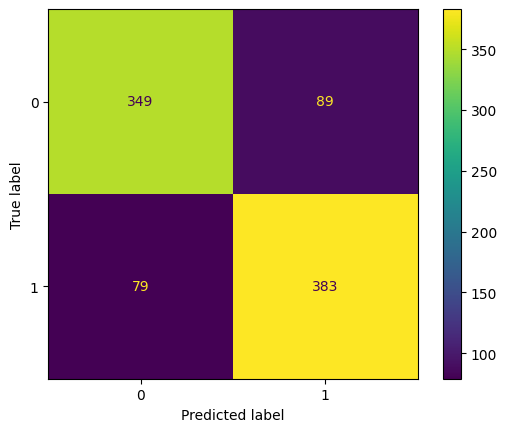

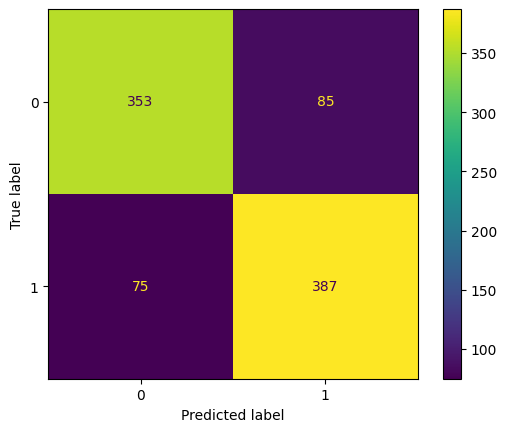

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

target = sen_df["pos"]

tfd = pd.DataFrame(tf_idf.toarray(), index=sen_df.index)
wfd = pd.DataFrame(sen_counts.toarray(), index=sen_df.index)

X_tf_train, X_tf_test, Y_tf_train, Y_tf_test = train_test_split(tfd, target, test_size=0.3, random_state=29)
X_wf_train, X_wf_test, Y_wf_train, Y_wf_test = train_test_split(wfd, target, test_size=0.3, random_state=29)

tfnb = MultinomialNB()
wfnb = MultinomialNB()
Y_tf_pred = tfnb.fit(X_tf_train, Y_tf_train).predict(X_tf_test)
Y_wf_pred = wfnb.fit(X_wf_train, Y_wf_train).predict(X_wf_test)

ConfusionMatrixDisplay.from_predictions(Y_tf_test, Y_tf_pred)
ConfusionMatrixDisplay.from_predictions(Y_wf_test, Y_wf_pred)

print("TF accuracy:", accuracy_score(Y_tf_pred, Y_tf_test))
print("WF accuracy:", accuracy_score(Y_wf_pred, Y_wf_test))

# Part 4
1. The `category_name` column in the `20newsgroups` dataset is of `str` type, which can be encoded in integer like `category` therefore is not needed.
A lookup table can be used to map integer back to their actual name.
2. The loading of `imdb_labelled.txt` is not optimal. Inconsistency in the raw input should be addressed to leverage pandas loader which is much more efficient.
3. We can remove stop words and hard-to-parse data such as alphanumerical terms (terms with both alphabets and numerical digits) before building the analyzer for better performance of downstream tasks.